Olá, Rosana

Meu nome é Ramon. Ao ao longo do texto farei algumas observações sobre melhorias no código. Nas partes em que não houver comentários, está tudo certo, ok? Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

###

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição
- Bons gráficos
    
<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> ajustar nans e teste de hipótese </span>


Portanto, sugiro que você corrija os pontos indicados.
    
Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário em **azul** para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas com revisores usando os comentários ou buscar ajuda de um tutor.
Bom trabalho. 


</div>



<div class="alert alert-block alert-success">
<b> Comentário Geral do revisor: </b> <a class="tocSkip"></a>

Tudo certo agora. Parabéns pelo empenho. Desejo sucesso na jornada.

</div>


# -**Analise de Dados de Video Games**

### **Importacao das Bibliotecas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#### **Carregamento dos Dados**

In [2]:
df_games = pd.read_csv('/datasets/games.csv')

#### **Exploracao dos Dados**

In [3]:
#imprimindo as informacoes gerais sobre o DataFrame
print(df_games.info())
print(df_games.head())
print(df_games.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29

### Preparando os Dados

In [4]:
#Percorrendo os cabecalhos e transformando - as  em minusculas
new_columns_names = []

for old_columns_names in df_games.columns:

    new_names = old_columns_names.lower()
    new_columns_names.append(new_names)

df_games.columns = new_columns_names
print(df_games.columns)
print(df_games.info())

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [5]:
#transformando os valores TBD e N/A em valores NaN

df_games['user_score'] = df_games['user_score'].replace(['TBD', 'tbd', 'N/A'], np.nan)

print(df_games['user_score'])

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: object


In [6]:
# convertendo user_score em float

df_games['user_score'] = df_games['user_score'].astype(float)
print(df_games.dtypes)

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


In [7]:
#excluindo valores ausentes da coluna 'name' e 'genre'

df_games['name'] = df_games['name'].fillna('desconhecido')
df_games['genre'] = df_games['genre'].fillna('desconhecido')

df_games_clean = df_games

print(df_games_clean)
print(df_games.info())

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  ot



<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- oriento preencher nan com 'desconhecido'

</div>



<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- oriento deixar em branco para não introduzir viés

</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2: </b> <a class="tocSkip"></a>

correto
</div>


Colunas e nomes: os nomes de todas as colunas foram convertidos pra minusculas, porque embora nao mude o tipo de dado em si, e uma pratica padrao para garantir a consistencia e facilitar a manipulacao dos dados.
user_score: foi alterado para de object para float64, porque tinha valores nao numerico, como 'TBD' e 'N/A', que impediam que o Pandas a reconhecesse como um numero. para poder realizar analises estatisticas e calculos com essa coluna, esses valores foram substituidos por NaN.

Minha abordagem sera deixar os valores ausentes em branco e nao preenche-los. optei por essa estrategia para evitar a introducao de tendencias no conjunto de dados. Se eu preenchesse as lacunas com valores como media, ou a mediana, eu estaria a criar dados que nao existiam, o que poderia distorcer as estatisticas e as conclusoes da minha analise, especialmente com um alto numero de valores ausentes.

Os campos 'name' e 'genre' possuíam apenas 2 valores ausentes cada. Como esse numero é muito pequeno em um conjunto de 16.715 entradas, optou-se por preencher esses valores com 'desconhecido', garantindo que os dados fiquem completos sem afetar a analise.

In [8]:
#Calculando o total de vendas em todas as regioes


df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

print(df_games.total_sales)
print(df_games.info())

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16715, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(8), object(4)
mem

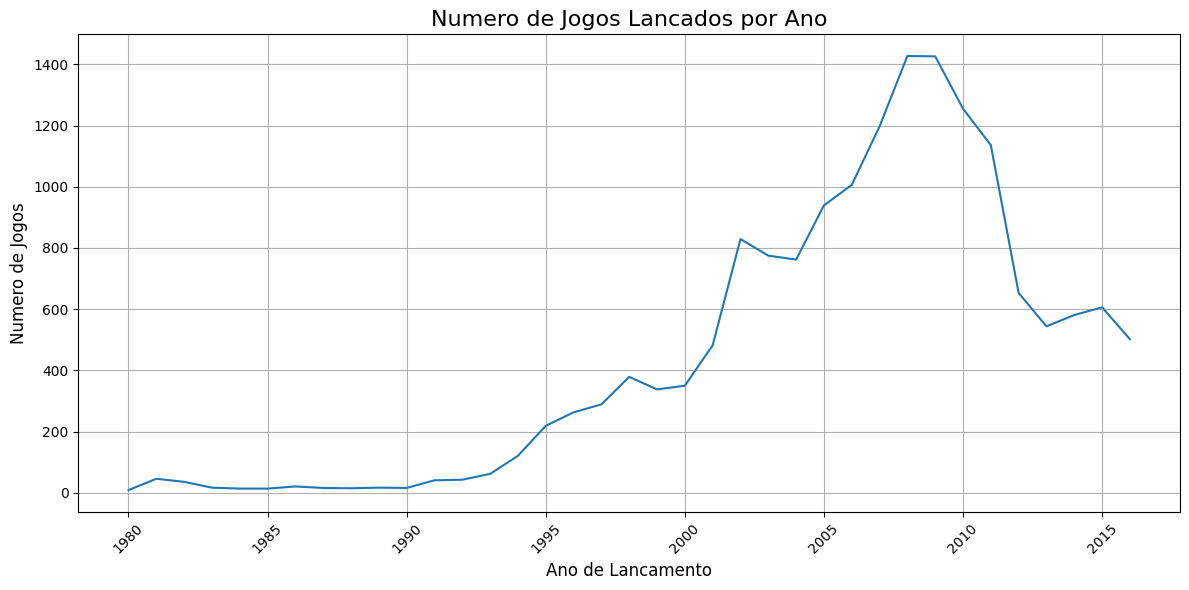

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64


In [9]:
#Numero de jogos lancados por ano
games_per_year = df_games.groupby('year_of_release')['name'].count()

plt.figure(figsize=(12, 6))
games_per_year.plot(kind='line')
plt.title('Numero de Jogos Lancados por Ano', fontsize= 16)
plt.xlabel('Ano de Lancamento', fontsize=12)
plt.ylabel('Numero de Jogos', fontsize=12)
plt.grid(True)
plt.xticks(games_per_year.index[::5], rotation=45)
plt.tight_layout()

plt.show()
print(games_per_year)

Os dados do periodo de 2012 a 2016 sao significativos, pois e onde a quantidade de lançamentos se manteve em uma faixa mais consistente, em oposição aos anos de crescimento explosivo.

Melhores plataformas por vendas ao longo do tempo:


<Figure size 1200x600 with 0 Axes>

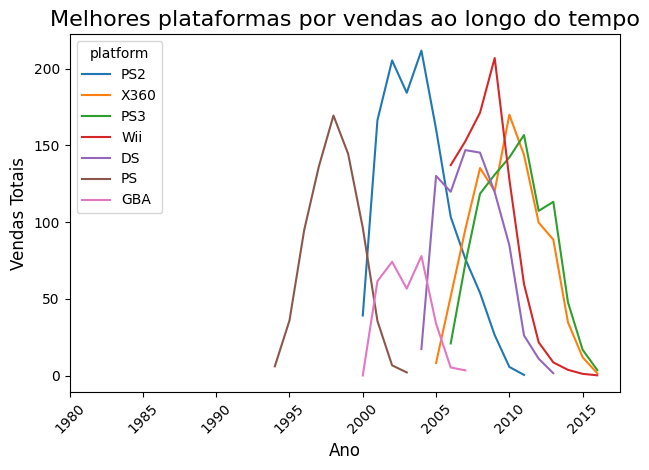

platform         PS2  X360  PS3  Wii    DS  PS  GBA
year_of_release                                    
1980.0           NaN   NaN  NaN  NaN   NaN NaN  NaN
1981.0           NaN   NaN  NaN  NaN   NaN NaN  NaN
1982.0           NaN   NaN  NaN  NaN   NaN NaN  NaN
1983.0           NaN   NaN  NaN  NaN   NaN NaN  NaN
1984.0           NaN   NaN  NaN  NaN   NaN NaN  NaN
1985.0           NaN   NaN  NaN  NaN  0.02 NaN  NaN
1986.0           NaN   NaN  NaN  NaN   NaN NaN  NaN


In [10]:
#Vendas por plataforma
top_sete = df_games.groupby(['platform'])['total_sales'].sum().nlargest(7).index
vendas_por_plataforma = df_games.groupby(['year_of_release','platform'])['total_sales'].sum().unstack()[top_sete]




print('Melhores plataformas por vendas ao longo do tempo:')


plt.figure(figsize=(12, 6))
vendas_por_plataforma.plot(kind='line')
plt.title('Melhores plataformas por vendas ao longo do tempo', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Vendas Totais', fontsize=12)
plt.xticks(vendas_por_plataforma.index[::5], rotation=45)
plt.tight_layout()

plt.show()
print(vendas_por_plataforma.head(7))

####Plataforma que costumavam ser populares e desapareceram.
Olhando para linhas que comecam em anos anterios, e possivel ver que a venda de algumas plataformas diminuiu e parou indicando que elas nao tem mais vendas significativas. 
PS1: sua linha de venda atinge o pico em 1998 e desaparece completamente nos anos seguintes.
GBA: O pico de vendas acontece em 2002 e a linha cai para zero nos anos seguintes.
PS2 e DS(NINTENDO DS): Embora tenha tido picos de vandas impressionantes, suas linhas caem drasticamente depois de 2010.

####Tempo para novas plataformas aparecerem e antigas desaparecerem.
Surgimento: Uma nova plataforma leva geralmente leva de 1 a 3 anos para se consolidar a alcar o seu pico de vendas.

Desaparecimento: O ciclo de vida de uma plataforma, desde o seu lancamento ate o declinio de suas vendas, dura em media de 6 a 10 anos

In [11]:

#Encontrandoas plataformas lideres em vendas
df_recent_games = df_games[(df_games['year_of_release'] >= 2012) & (df_games['year_of_release'] <= 2015)]

vendas_por_plataforma = df_recent_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print('Plataformas lideres em vendas (2012-2015):')
print(vendas_por_plataforma)


Plataformas lideres em vendas (2012-2015):
platform
PS3     285.19
PS4     244.89
X360    235.02
3DS     179.47
XOne    133.17
WiiU     77.59
PC       57.40
PSV      44.93
Wii      35.19
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64


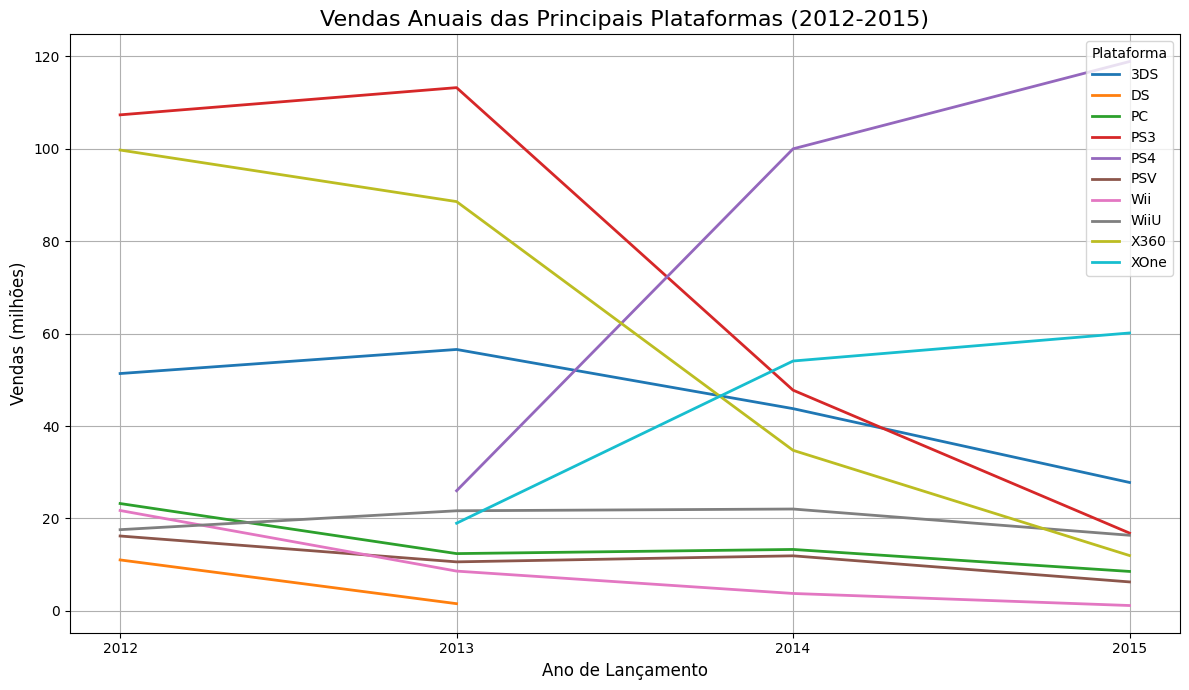

In [12]:


top_10_recent_platforms = df_recent_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index.tolist()

recent_sales_pivot = df_recent_games[df_recent_games['platform'].isin(top_10_recent_platforms)].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'

)

plt.figure(figsize=(12, 7))
recent_sales_pivot.plot(ax=plt.gca(), linewidth=2)

plt.title('Vendas Anuais das Principais Plataformas (2012-2015)', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Vendas (milhões)', fontsize=12)
plt.grid(True)
plt.xticks(recent_sales_pivot.index)
plt.legend(title='Plataforma')
plt.tight_layout()

plt.show()




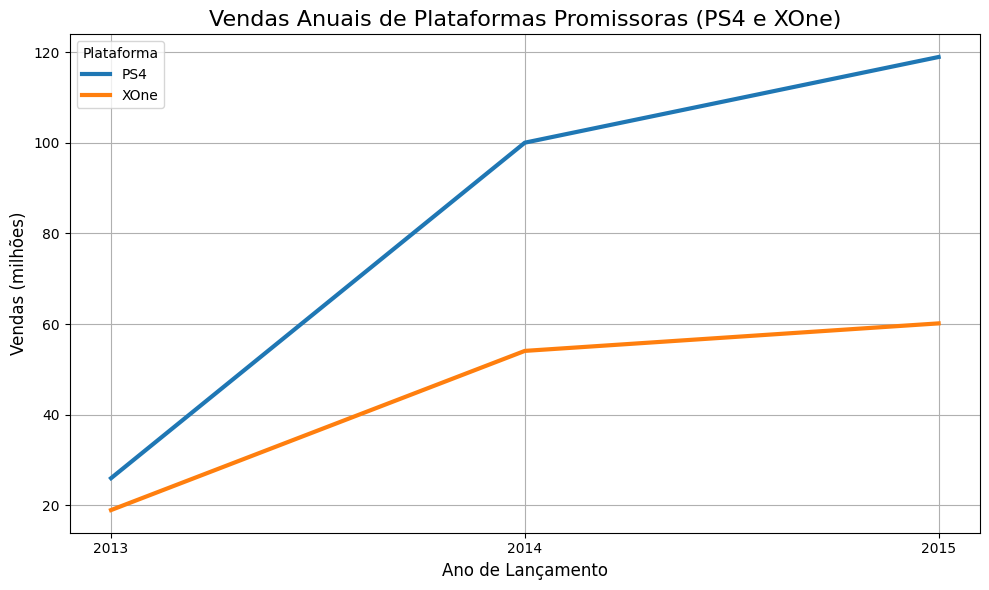

In [13]:

#Selecionando plataformas potencialmente lucrativas

potentially_lucrative_platforms = ['PS4', 'XOne']


df_lucrative_platforms = df_recent_games[df_recent_games['platform'].isin(potentially_lucrative_platforms)]


lucrative_sales_pivot = df_lucrative_platforms.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'
)


plt.figure(figsize=(10, 6))
lucrative_sales_pivot.plot(ax=plt.gca(), linewidth=3)

plt.title('Vendas Anuais de Plataformas Promissoras (PS4 e XOne)', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Vendas (milhões)', fontsize=12)
plt.grid(True)
plt.xticks(lucrative_sales_pivot.index)
plt.legend(title='Plataforma')
plt.tight_layout()



plt.show()


<Figure size 1000x600 with 0 Axes>

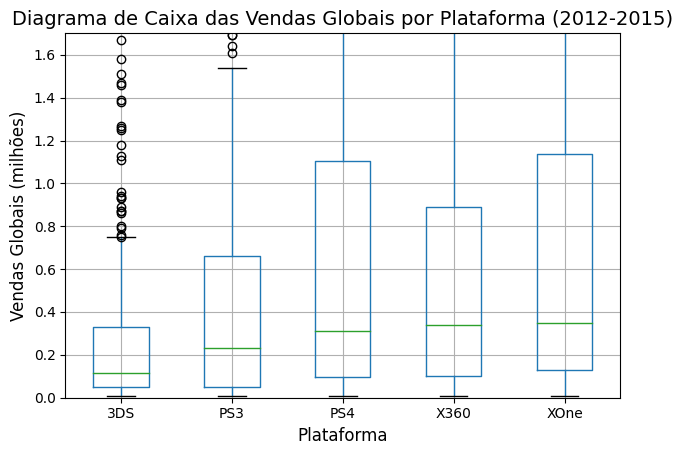

In [14]:

# Filtrando o DataFrame para o período recente (2012-2015) e para as 5 principais plataformas
top_5_platforms = ['PS3', 'PS4', 'X360', '3DS', 'XOne']
df_filtered = df_games[(df_games['year_of_release'] >= 2012) & (df_games['year_of_release'] <= 2015) & (df_games['platform'].isin(top_5_platforms))]

# Criando o diagrama de caixa
plt.figure(figsize=(10, 6))
df_filtered.boxplot(column='total_sales', by='platform')

# Ajustando o gráfico para melhor visualização
plt.suptitle('')
plt.title('Diagrama de Caixa das Vendas Globais por Plataforma (2012-2015)', fontsize=14)
plt.ylabel('Vendas Globais (milhões)', fontsize=12)
plt.xlabel('Plataforma', fontsize=12)
plt.ylim(0, 1.7) # Limita o eixo Y para evitar o impacto de outliers extremos
plt.tight_layout()

# Salvando e exibindo o gráfico
plt.savefig('diagrama_caixa_vendas_recentes.png')
plt.show()


A maioria dos jogos tem vendas baixas: O diagrama de mostra que a maiori parte dos dados esta muito proximo do zero. Isso significa que independentemente da plataforma, a maioria dos jogos vende uma quantidade relativamente pequena de copias.

O mercado e desigual: As vendas totais das plataformas sao impulsionadas por alguns jogos de sucesso extremo. Esses poucos titulos com vendas enormes sao os responsaveis pela maior parte da receita da plataforma.
 A grande maioria dos jogos tem vendas modestas.

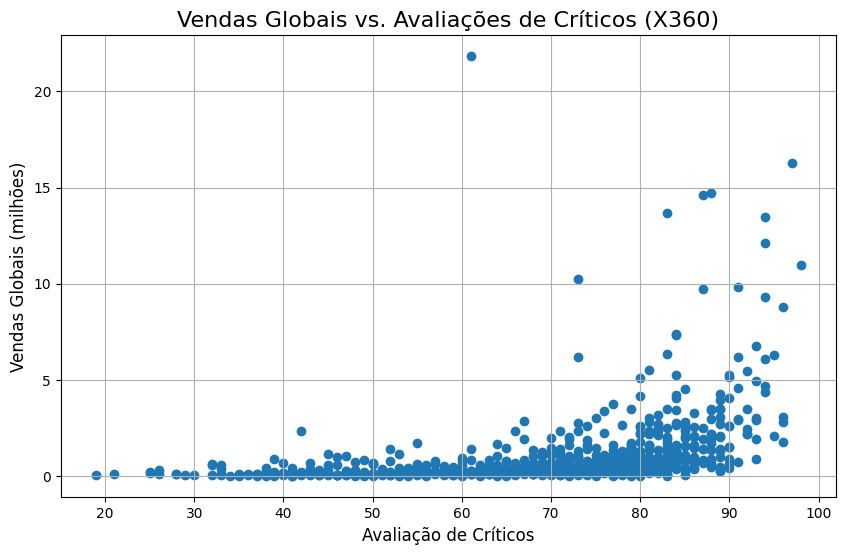

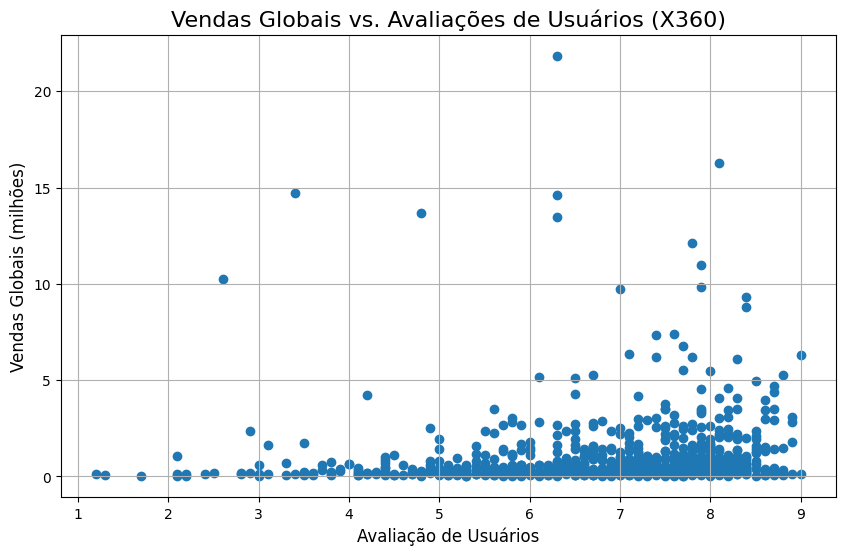

Correlação entre vendas e avaliação de críticos (X360): 0.39
Correlação entre vendas e avaliação de usuários (X360): 0.11


In [15]:
# Filtrando os dados para a plataforma X360
df_x360 = df_games[df_games['platform'] == 'X360']

# Analisando a relação entre avaliações e vendas
# Removendo linhas com valores ausentes para o cálculo da correlação
df_x360_filtered = df_x360.dropna(subset=['critic_score', 'user_score'])

# Criando o gráfico de dispersão para as avaliações de críticos
plt.figure(figsize=(10, 6))
plt.scatter(df_x360_filtered['critic_score'], df_x360_filtered['total_sales'])
plt.title('Vendas Globais vs. Avaliações de Críticos (X360)', fontsize=16)
plt.xlabel('Avaliação de Críticos', fontsize=12)
plt.ylabel('Vendas Globais (milhões)', fontsize=12)
plt.grid(True)
plt.savefig('x360_critico_scatter.png')
plt.show()

# Criando o gráfico de dispersão para as avaliações de usuários
plt.figure(figsize=(10, 6))
plt.scatter(df_x360_filtered['user_score'], df_x360_filtered['total_sales'])
plt.title('Vendas Globais vs. Avaliações de Usuários (X360)', fontsize=16)
plt.xlabel('Avaliação de Usuários', fontsize=12)
plt.ylabel('Vendas Globais (milhões)', fontsize=12)
plt.grid(True)
plt.savefig('x360_usuario_scatter.png')
plt.show()

# Calculando e imprimindo a correlação entre as avaliações e as vendas
correlation_critico = df_x360_filtered['critic_score'].corr(df_x360_filtered['total_sales'])
correlation_usuario = df_x360_filtered['user_score'].corr(df_x360_filtered['total_sales'])

print('Correlação entre vendas e avaliação de críticos (X360): {:.2f}'.format(correlation_critico))
print('Correlação entre vendas e avaliação de usuários (X360): {:.2f}'.format(correlation_usuario))

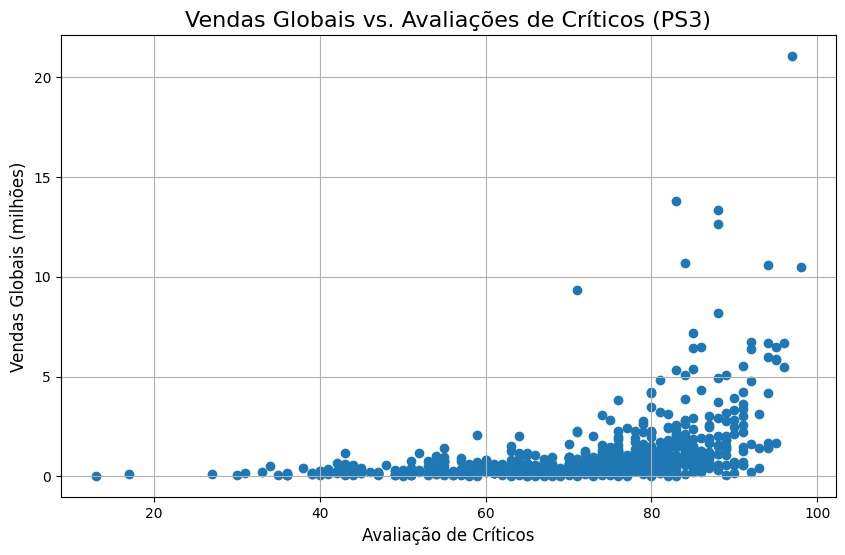

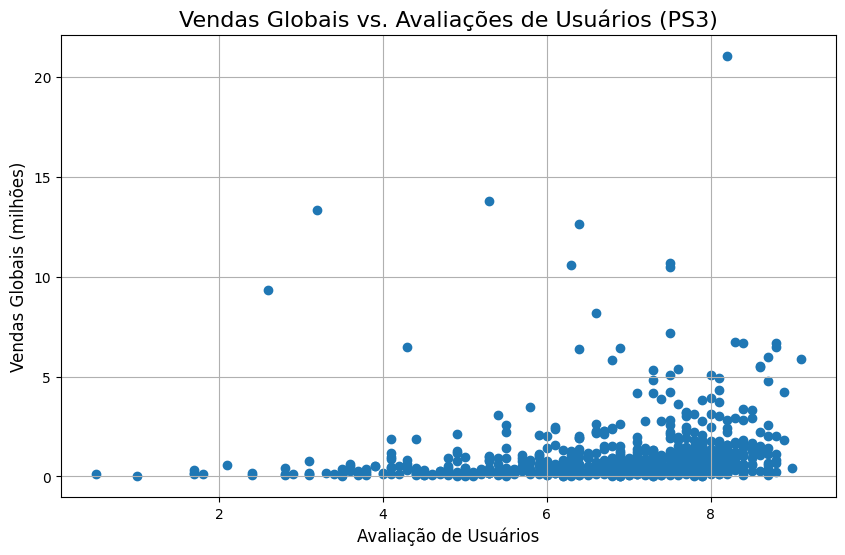

Correlação entre vendas e avaliação de críticos (PS3): 0.43
Correlação entre vendas e avaliação de usuários (PS3): 0.14


In [16]:
df_ps3 = df_games[df_games['platform'] == 'PS3']

# Removendo linhas com valores ausentes para o cálculo da correlação
df_ps3_filtered = df_ps3.dropna(subset=['critic_score', 'user_score'])

# Criando o gráfico de dispersão para as avaliações de críticos
plt.figure(figsize=(10, 6))
plt.scatter(df_ps3_filtered['critic_score'], df_ps3_filtered['total_sales'])
plt.title('Vendas Globais vs. Avaliações de Críticos (PS3)', fontsize=16)
plt.xlabel('Avaliação de Críticos', fontsize=12)
plt.ylabel('Vendas Globais (milhões)', fontsize=12)
plt.grid(True)
plt.savefig('ps3_critico_scatter.png')
plt.show()

# Criando o gráfico de dispersão para as avaliações de usuários
plt.figure(figsize=(10, 6))
plt.scatter(df_ps3_filtered['user_score'], df_ps3_filtered['total_sales'])
plt.title('Vendas Globais vs. Avaliações de Usuários (PS3)', fontsize=16)
plt.xlabel('Avaliação de Usuários', fontsize=12)
plt.ylabel('Vendas Globais (milhões)', fontsize=12)
plt.grid(True)
plt.savefig('ps3_usuario_scatter.png')
plt.show()

# Calculando e imprimindo a correlação entre as avaliações e as vendas
correlation_critico_ps3 = df_ps3_filtered['critic_score'].corr(df_ps3_filtered['total_sales'])
correlation_usuario_ps3 = df_ps3_filtered['user_score'].corr(df_ps3_filtered['total_sales'])

print('Correlação entre vendas e avaliação de críticos (PS3): {:.2f}'.format(correlation_critico_ps3))
print('Correlação entre vendas e avaliação de usuários (PS3): {:.2f}'.format(correlation_usuario_ps3))

A opinião dos criticos tem um impacto moderado nas vendas, enquanto a opinião dos usuarios parece ter pouco ou nenhum impacto direto, tanto no X360 quanto no PS3.

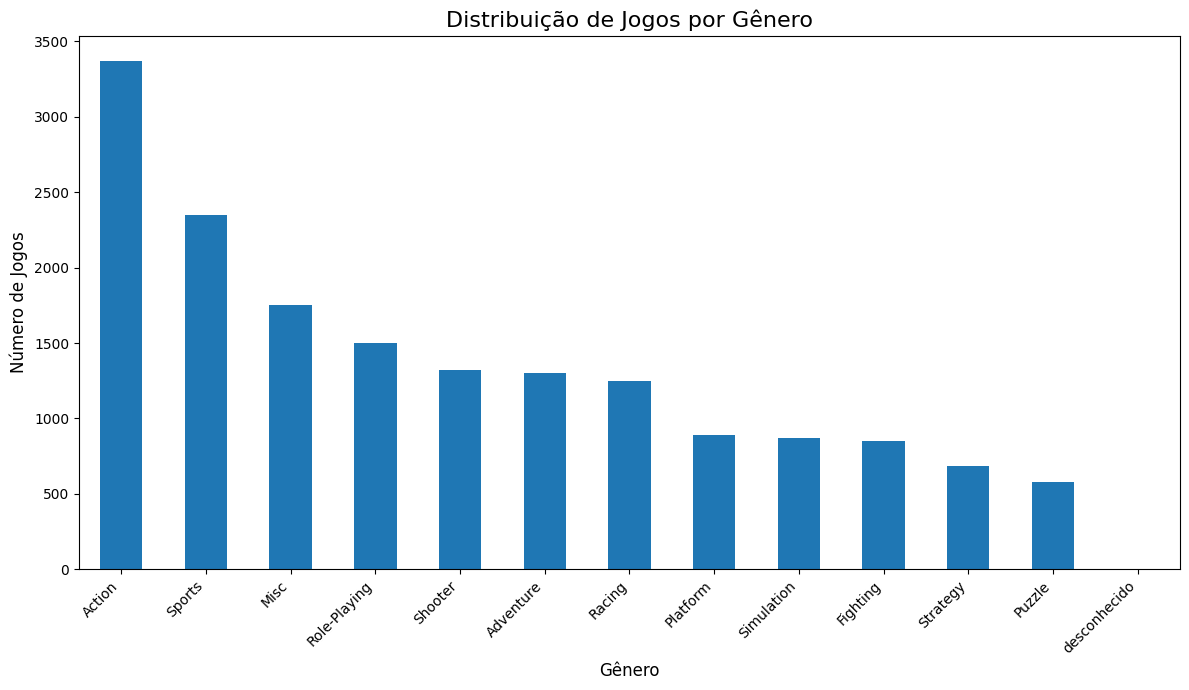

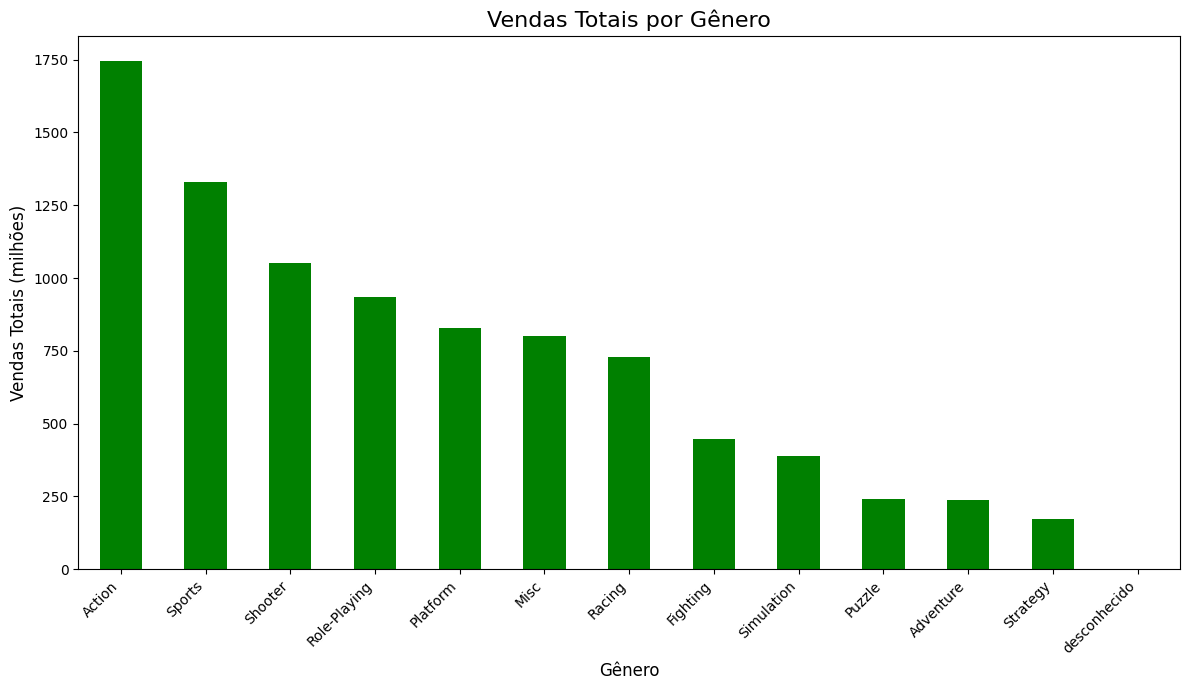

Distribuição de jogos por gênero:
genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
desconhecido       2
Name: name, dtype: int64

Vendas totais por gênero:
genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
desconhecido       2.42
Name: total_sales, dtype: float64


In [17]:
# Análise de distribuição por gênero (número de jogos)
games_by_genre = df_games.groupby('genre')['name'].count().sort_values(ascending=False)

# Análise de lucratividade por gênero (vendas totais)
sales_by_genre = df_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Criando o gráfico da distribuição de jogos por gênero
plt.figure(figsize=(12, 7))
games_by_genre.plot(kind='bar')
plt.title('Distribuição de Jogos por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Número de Jogos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('distribuicao_genero.png')
plt.show()

# Criando o gráfico da lucratividade por gênero
plt.figure(figsize=(12, 7))
sales_by_genre.plot(kind='bar', color='green')
plt.title('Vendas Totais por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Vendas Totais (milhões)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('vendas_genero.png')
plt.show()

# Imprimindo os resultados para uma análise mais detalhada
print('Distribuição de jogos por gênero:')
print(games_by_genre)
print('\nVendas totais por gênero:')
print(sales_by_genre)

Os gêneros que geraram mais receita são Action, Sports e Shooter, com vendas acima de 1 bilhao de dolares cada. Isso se deve, em grande parte, à sua enorme popularidade, impulsionada por franquias de grande sucesso.

Sim, podemos fazer algumas generalizações:

Generos com vendas altas (lucrativos): São os gêneros com o maior número de lançamentos e também com as maiores vendas, como Action e Sports. Isso sugere que eles têm um apelo de mercado muito amplo. O genero Shooter, embora tenha menos lançamentos, e extremamente lucrativo, o que indica que os títulos desse gênero têm um desempenho de vendas muito forte individualmente.

Generos com vendas baixas: Generos como Puzzle, Adventure e Strategy tem um número considerável de jogos, mas suas vendas totais sao significativamente menores. Isso sugere que, embora a produção de jogos nesses gêneros seja alta, a receita por jogo é, em media, muito menor em comparação com os generos mais lucrativos.

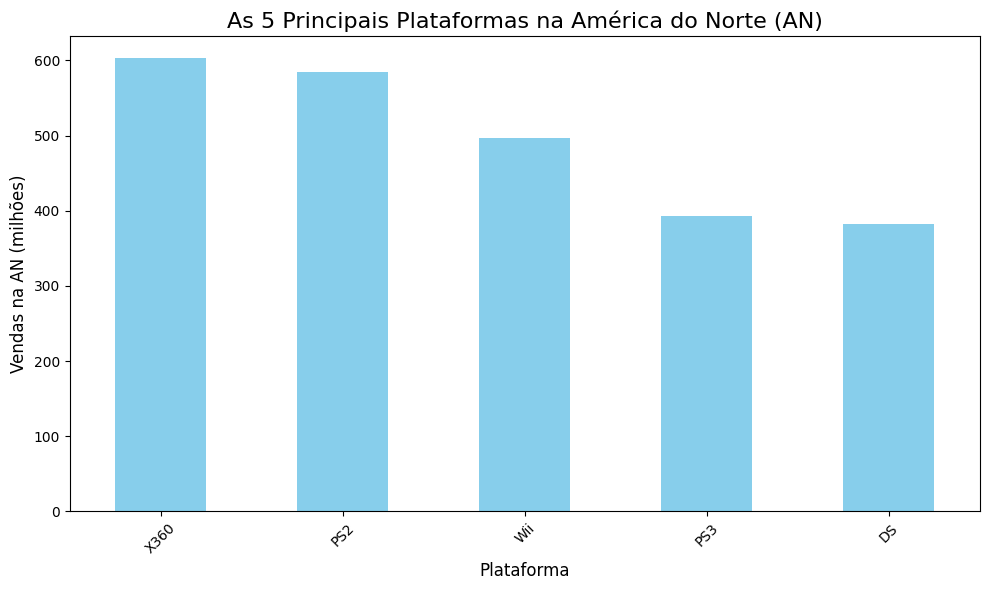

As 5 plataformas principais na América do Norte (AN):
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64


In [18]:
# Calculando as vendas totais por plataforma na região da América do Norte (AN)
na_platform_sales = df_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
top_5_na_platforms = na_platform_sales.head(5)

# Criando o gráfico de barras para visualizar as 5 principais plataformas
plt.figure(figsize=(10, 6))
top_5_na_platforms.plot(kind='bar', color='skyblue')
plt.title('As 5 Principais Plataformas na América do Norte (AN)', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Vendas na AN (milhões)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_5_na_platforms.png')
plt.show()

# Imprimindo a lista das 5 principais plataformas
print('As 5 plataformas principais na América do Norte (AN):')
print(top_5_na_platforms)

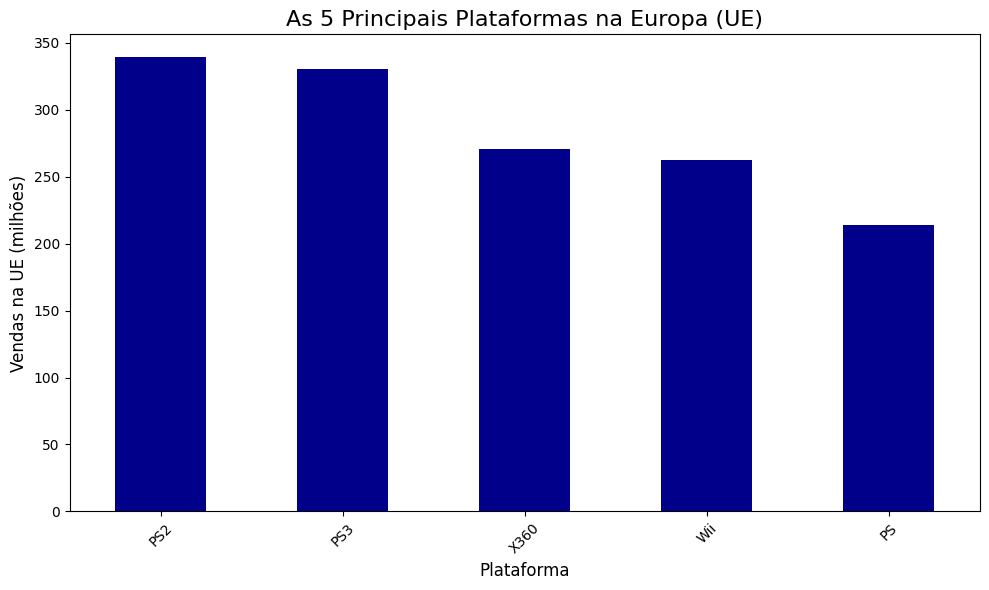

As 5 plataformas principais na Europa (UE):
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64


In [19]:
# Calculando as vendas totais por plataforma na região da Europa (UE)
eu_platform_sales = df_games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
top_5_eu_platforms = eu_platform_sales.head(5)

# Criando o gráfico de barras para visualizar as 5 principais plataformas
plt.figure(figsize=(10, 6))
top_5_eu_platforms.plot(kind='bar', color='darkblue')
plt.title('As 5 Principais Plataformas na Europa (UE)', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Vendas na UE (milhões)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_5_eu_platforms.png')
plt.show()

# Imprimindo a lista das 5 principais plataformas
print('As 5 plataformas principais na Europa (UE):')
print(top_5_eu_platforms)

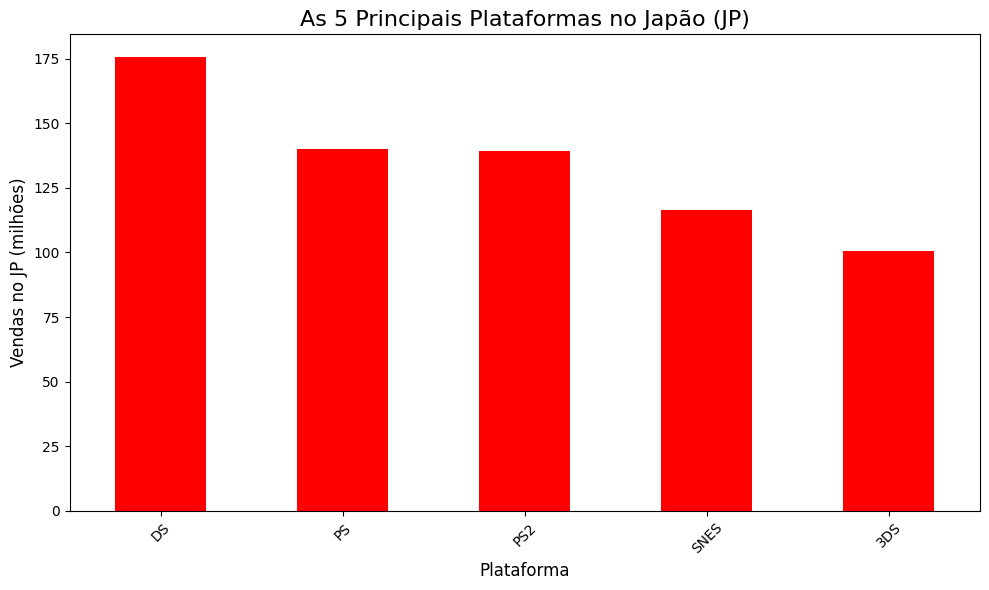

As 5 plataformas principais no Japão (JP):
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


In [20]:
# Calculando as vendas totais por plataforma na região do Japão (JP)
jp_platform_sales = df_games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
top_5_jp_platforms = jp_platform_sales.head(5)

# Criando o gráfico de barras para visualizar as 5 principais plataformas
plt.figure(figsize=(10, 6))
top_5_jp_platforms.plot(kind='bar', color='red')
plt.title('As 5 Principais Plataformas no Japão (JP)', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Vendas no JP (milhões)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_5_jp_platforms.png')
plt.show()

# Imprimindo a lista das 5 principais plataformas
print('As 5 plataformas principais no Japão (JP):')
print(top_5_jp_platforms)

O mercadda America do Norte e dominado pelo Xbox 360, mas e extremamente competitivo, com o ps2 o e o Wii logo astras. Isso mostra que a regiao tem uma preferencia dividida entre a Microsoft, a Sony e a Nintendo.

A Europa demostrantra uma clara preferencia pelo ecossistema Playstation. O PS2 e o PS3 lideram zs vendas, com p PS1 tambem entre os cincos primeiros, o que destaca a lealdade de longa data a marca Sony na regiao. O X360 e popular, mas nao consegue superar a lideranca do Playstation.

O mercado japones e o mais distinto e tem uma preferencia acentuada por consoles portateis. O Nintendo DS e o lider absoluto, e o Nintendo 3DS tambem  esta no top . A presenca do SNES mostra uma forte nolstalgia e a popularidade de consoles classicos na regiao, algo que nao e visto nas outras. O X360, lider na Americs do Norte, nao aparece no top 5 do japao, ressaltando a diferenca nas preferencias.

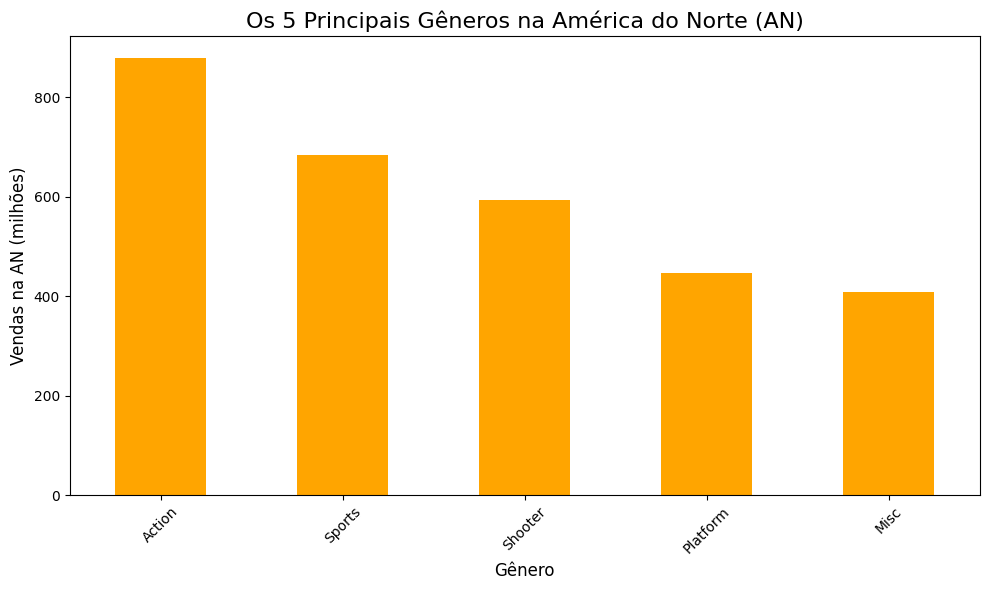

Os 5 principais gêneros na América do Norte (AN):
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64


In [21]:
# Calculando as vendas totais por gênero na região da América do Norte (AN)
na_genre_sales = df_games.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
top_5_na_genres = na_genre_sales.head(5)

# Criando o gráfico de barras para visualizar os 5 principais gêneros
plt.figure(figsize=(10, 6))
top_5_na_genres.plot(kind='bar', color='orange')
plt.title('Os 5 Principais Gêneros na América do Norte (AN)', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Vendas na AN (milhões)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_5_na_genres.png')
plt.show()

# Imprimindo a lista dos 5 principais gêneros
print('Os 5 principais gêneros na América do Norte (AN):')
print(top_5_na_genres)

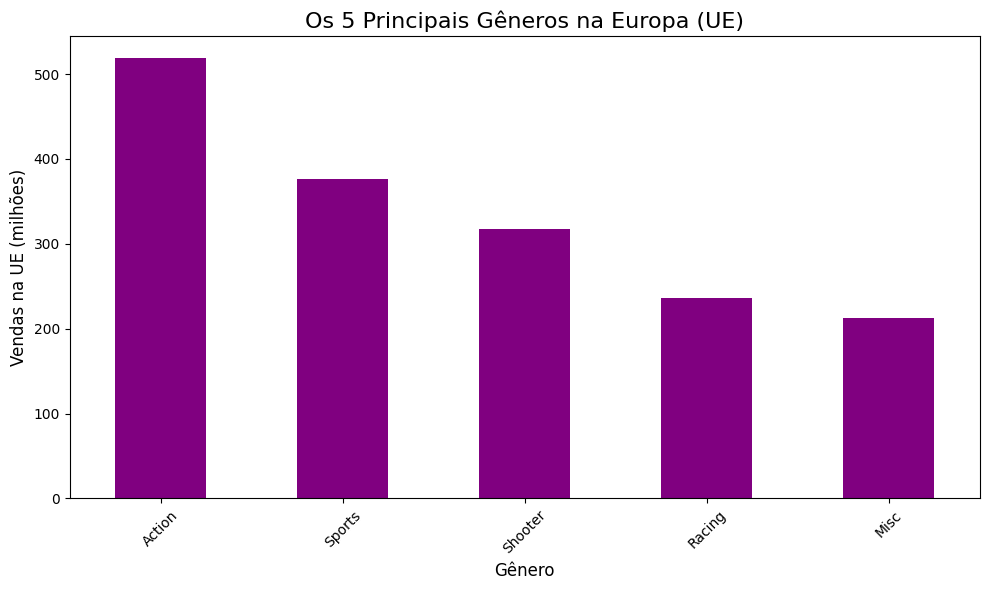

Os 5 principais gêneros na Europa (UE):
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64


In [22]:
# Calculando as vendas totais por gênero na região da Europa (UE)
eu_genre_sales = df_games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
top_5_eu_genres = eu_genre_sales.head(5)

# Criando o gráfico de barras para visualizar os 5 principais gêneros
plt.figure(figsize=(10, 6))
top_5_eu_genres.plot(kind='bar', color='purple')
plt.title('Os 5 Principais Gêneros na Europa (UE)', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Vendas na UE (milhões)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_5_eu_genres.png')
plt.show()

# Imprimindo a lista dos 5 principais gêneros
print('Os 5 principais gêneros na Europa (UE):')
print(top_5_eu_genres)

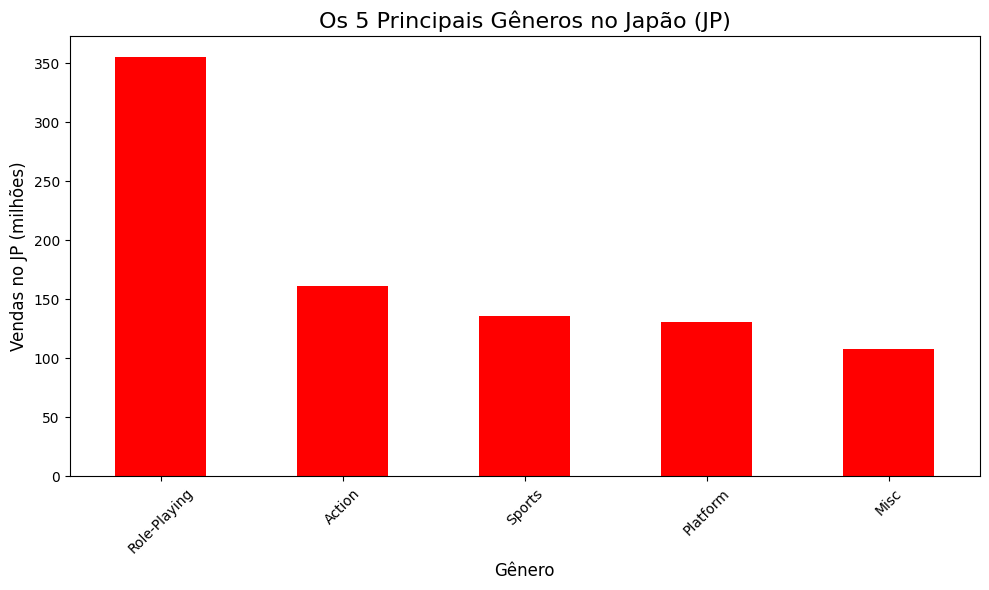

Os 5 principais gêneros no Japão (JP):
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


In [23]:
# Calculando as vendas totais por gênero na região do Japão (JP)
jp_genre_sales = df_games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
top_5_jp_genres = jp_genre_sales.head(5)

# Criando o gráfico de barras para visualizar os 5 principais gêneros
plt.figure(figsize=(10, 6))
top_5_jp_genres.plot(kind='bar', color='red')
plt.title('Os 5 Principais Gêneros no Japão (JP)', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Vendas no JP (milhões)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_5_jp_genres.png')
plt.show()

# Imprimindo a lista dos 5 principais gêneros
print('Os 5 principais gêneros no Japão (JP):')
print(top_5_jp_genres)

Amrica do Norte e Europa, Ambas as regioes tem um gosto semelhante, com Action, Sports e Shooter dominando o top 5. Esses generos sao populares em mercados ocidentais por sua acao e competitividade.

Japao, o mercado japones se destaca pela sua preferencia por RPG, que lideramas vendas com uma grande margem. Isso reflete o apelo duradouro dos RPGs no Japao, que e um mercado culturalmente distinto. Outros generos como Platform e Misc tambem se mantem fortes.

Enquanto os outros mercados ocidentais sao influenciados por generos de acao e esporte, o mercado japones e fortemente influenciado pelos jogos de RPG.

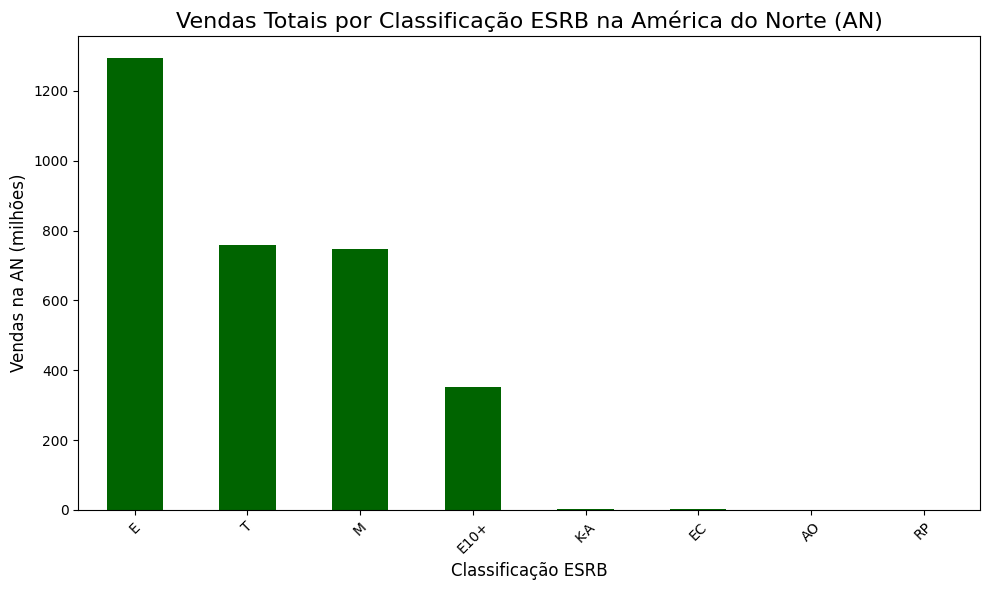

Vendas totais por classificação ESRB na América do Norte (AN):
rating
E       1292.99
T        759.75
M        748.48
E10+     353.32
K-A        2.56
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64


In [24]:
# Analisando o efeito das classificações ESRB nas vendas na América do Norte (AN)
na_sales_by_rating = df_games.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

# Criando o gráfico de barras para visualizar o impacto das classificações
plt.figure(figsize=(10, 6))
na_sales_by_rating.plot(kind='bar', color='darkgreen')
plt.title('Vendas Totais por Classificação ESRB na América do Norte (AN)', fontsize=16)
plt.xlabel('Classificação ESRB', fontsize=12)
plt.ylabel('Vendas na AN (milhões)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('na_esrb_sales.png')
plt.show()

# Imprimindo a lista de vendas por classificação
print('Vendas totais por classificação ESRB na América do Norte (AN):')
print(na_sales_by_rating)

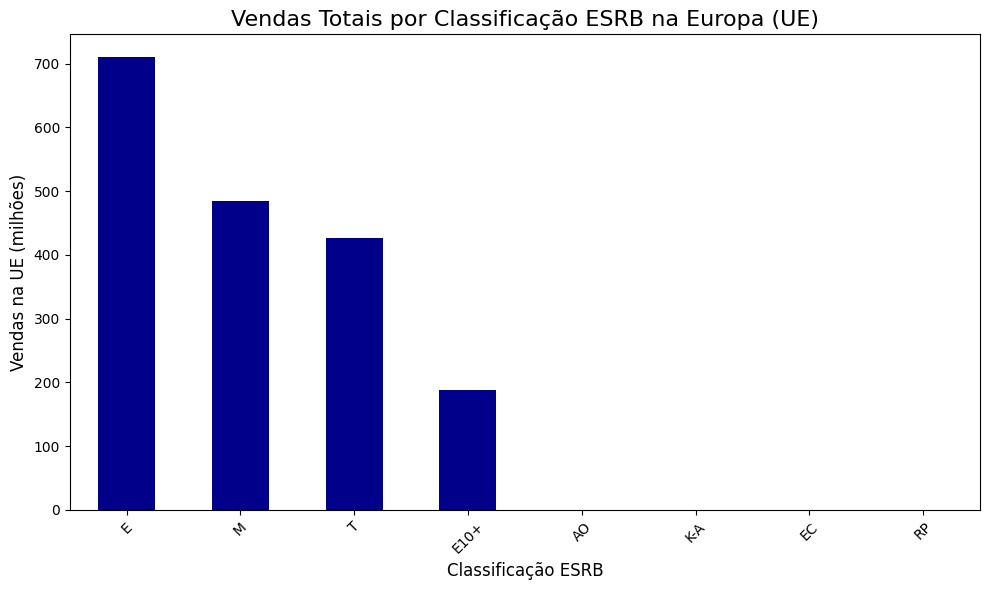

Vendas totais por classificação ESRB na Europa (UE):
rating
E       710.25
M       483.97
T       427.03
E10+    188.52
AO        0.61
K-A       0.27
EC        0.11
RP        0.08
Name: eu_sales, dtype: float64


In [25]:

# Analisando o efeito das classificações ESRB nas vendas na Europa (UE)
eu_sales_by_rating = df_games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

# Criando o gráfico de barras para visualizar o impacto das classificações
plt.figure(figsize=(10, 6))
eu_sales_by_rating.plot(kind='bar', color='darkblue')
plt.title('Vendas Totais por Classificação ESRB na Europa (UE)', fontsize=16)
plt.xlabel('Classificação ESRB', fontsize=12)
plt.ylabel('Vendas na UE (milhões)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('eu_esrb_sales.png')
plt.show()

# Imprimindo a lista de vendas por classificação
print('Vendas totais por classificação ESRB na Europa (UE):')
print(eu_sales_by_rating)

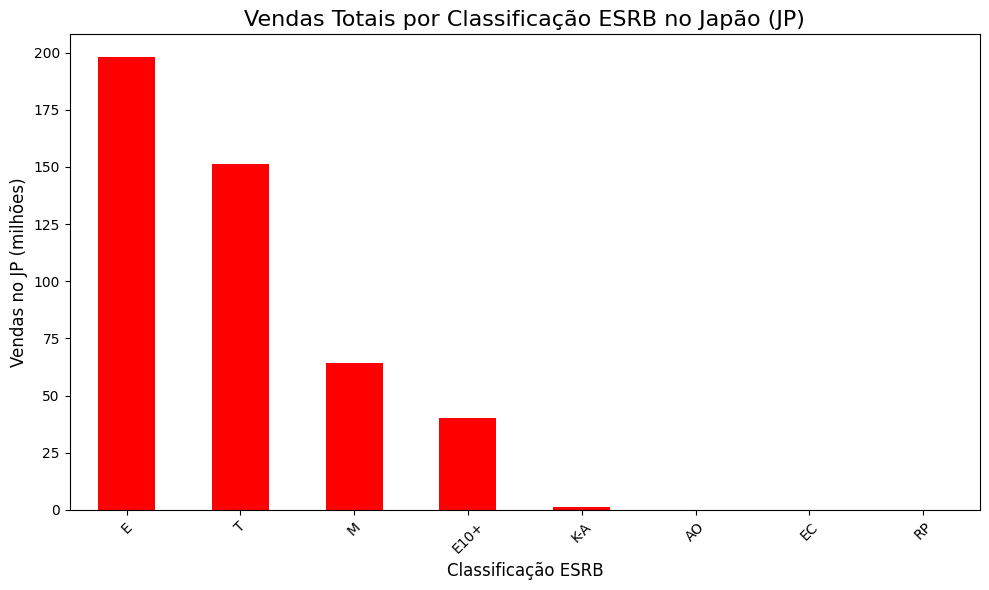

Vendas totais por classificação ESRB no Japão (JP):
rating
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
AO        0.00
EC        0.00
RP        0.00
Name: jp_sales, dtype: float64


In [26]:
# Analisando o efeito das classificações ESRB nas vendas no Japão (JP)
jp_sales_by_rating = df_games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Criando o gráfico de barras para visualizar o impacto das classificações
plt.figure(figsize=(10, 6))
jp_sales_by_rating.plot(kind='bar', color='red')
plt.title('Vendas Totais por Classificação ESRB no Japão (JP)', fontsize=16)
plt.xlabel('Classificação ESRB', fontsize=12)
plt.ylabel('Vendas no JP (milhões)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('jp_esrb_sales.png')
plt.show()

# Imprimindo a lista de vendas por classificação
print('Vendas totais por classificação ESRB no Japão (JP):')
print(jp_sales_by_rating)

America do Norte e Europa: Em ambas as regioes, a classificação E e a que mais vende, seguida por T e M. No entanto, a distancia entre as vendas dos jogos M e T e muito menor nesses mercados do que no Japao. Isso sugere que jogos para o publico adulto sao mais populares e tem um impacto significativo nas vendas nessas regioes.

Japao: Embora a classificacao E ainda lidere, a diferenca entre as vendas de jogos M e T é muito maior em comparacao com as vendas dos jogos E. Isso pode indicar uma preferencia cultural por jogos classificados como E e T, e uma menor demanda por jogos classificados como M.


As classificacoes de faixa etaria influenciam o sucesso de um jogo em cada regiao, refletindo as preferencias e culturas de cada mercado.

In [27]:

# Filtrando os dados de avaliacoes para as plataformas Xbox One e PC
user_scores_xone = df_games.loc[df_games['platform'] == 'XOne', 'user_score'].dropna()
user_scores_pc = df_games.loc[df_games['platform'] == 'PC', 'user_score'].dropna()

# Passo 1: Definir hipoteses
# H0: A média das notas de usuários no Xbox One é igual à do PC
# H1: A média das notas de usuários no Xbox One é diferente da do PC

alpha = 0.05  # nível de significância

# Passo 2: Avaliar se as variâncias são iguais
var_xone = user_scores_xone.var()
var_pc = user_scores_pc.var()
print(f"Variância Xbox One: {var_xone}")
print(f"Variância PC: {var_pc}")

equal_var = abs(var_xone - var_pc) < 0.01 * max(var_xone, var_pc)  
# critério simples: diferença menor que 1% → consideramos variâncias iguais

print(f"As variâncias podem ser consideradas iguais? {equal_var}")

# Passo 3: Rodar o teste t de Student com equal_var definido dinamicamente
results = stats.ttest_ind(user_scores_xone, user_scores_pc, equal_var=equal_var)

print("\nResultado do teste t:")
print(f"t-statistic: {results.statistic}")
print(f"p-value: {results.pvalue}")

# Passo 4: Interpretar o resultado
if results.pvalue < alpha:
    print("\nO p-value é menor que o nível de significância (0.05). Rejeitamos a hipótese nula.")
    print("Conclusao: As medias das classificacoes de usuarios para Xbox One e PC são estatisticamente diferentes.")
else:
    print("\nO p-value é maior que o nivel de significância (0.05). Nao rejeitamos a hipotese nula.")
    print("Conclusão: Nao ha evidencia suficiente para dizer que as medias das classificacoes de usuarios para Xbox One e PC são estatisticamente diferentes.")

Variância Xbox One: 1.9069968429360695
Variância PC: 2.3407871413372066
As variâncias podem ser consideradas iguais? False

Resultado do teste t:
t-statistic: -4.653422798410771
p-value: 4.935072360183574e-06

O p-value é menor que o nível de significância (0.05). Rejeitamos a hipótese nula.
Conclusao: As medias das classificacoes de usuarios para Xbox One e PC são estatisticamente diferentes.


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Precisamos seguir estes passos para o teste de hipótese:
- Definir a hipótese nula (ex: a altura média é igual entre homem e mulheres)
- Definir a hipótese alternativa (ex: a altura média não é igual entre homem e mulheres)
- Avaliar se as variâncias são iguais, por exemplo, calculando a variância da amostra e verificando a igualdade (ex: sample1.var() == sample2.var())
- Em seguida, ajustar equal_var=True no teste T se as variâncias forem iguais, senão usamos equal_var=False no teste T: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.
- Avaliar o resultado do teste T

</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2: </b> <a class="tocSkip"></a>

correto
</div>


Ha evidencias estatisticas para dizer que as medias das classificaoes de usuarios para as plataformas Xbox One e PC sao diferentes.

In [28]:
# Filtrando os dados de avaliações para os gêneros Action e Sports

user_scores_action = df_games.loc[df_games['genre'] == 'Action', 'user_score'].dropna()
user_scores_sports = df_games.loc[df_games['genre'] == 'Sports', 'user_score'].dropna()

# Passo 1: Definir hipóteses
# H0: A média das notas de usuários para jogos de Action é igual à dos jogos de Sports
# H1: A média das notas de usuários para jogos de Action é diferente da dos jogos de Sports

alpha = 0.05  # nível de significância

# Passo 2: Avaliar se as variâncias são iguais
var_action = user_scores_action.var()
var_sports = user_scores_sports.var()
print(f"Variância Action: {var_action}")
print(f"Variância Sports: {var_sports}")

equal_var = abs(var_action - var_sports) < 0.01 * max(var_action, var_sports)  
# critério simples: se a diferença for menor que 1% da maior variância → consideramos iguais

print(f"As variâncias podem ser consideradas iguais? {equal_var}")

# Passo 3: Rodar o teste t de Student com equal_var definido dinamicamente
results = stats.ttest_ind(user_scores_action, user_scores_sports, equal_var=equal_var)

print("\nResultado do teste t:")
print(f"t-statistic: {results.statistic}")
print(f"p-value: {results.pvalue}")

# Passo 4: Interpretar o resultado
if results.pvalue < alpha:
    print("\nO p-value é menor que o nível de significância (0.05). Rejeitamos a hipótese nula.")
    print("Conclusão: As médias das classificações de usuários para os gêneros Action e Sports são estatisticamente diferentes.")
else:
    print("\nO p-value é maior que o nível de significância (0.05). Não rejeitamos a hipótese nula.")
    print("Conclusão: Não há evidência suficiente para dizer que as médias das classificações de usuários para os gêneros Action e Sports são estatisticamente diferentes.")

Variância Action: 2.031746898033205
Variância Sports: 2.5965147189730033
As variâncias podem ser consideradas iguais? False

Resultado do teste t:
t-statistic: 1.57746791633354
p-value: 0.11483818791498286

O p-value é maior que o nível de significância (0.05). Não rejeitamos a hipótese nula.
Conclusão: Não há evidência suficiente para dizer que as médias das classificações de usuários para os gêneros Action e Sports são estatisticamente diferentes.


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Precisamos seguir estes passos para o teste de hipótese:
- Definir a hipótese nula (ex: a altura média é igual entre homem e mulheres)
- Definir a hipótese alternativa (ex: a altura média não é igual entre homem e mulheres)
- Avaliar se as variâncias são iguais, por exemplo, calculando a variância da amostra e verificando a igualdade (ex: sample1.var() == sample2.var())
- Em seguida, ajustar equal_var=True no teste T se as variâncias forem iguais, senão usamos equal_var=False no teste T: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.
- Avaliar o resultado do teste T

</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2: </b> <a class="tocSkip"></a>

correto
</div>


In [29]:
alpha = 0.05

print(f"Nível de significância escolhido: {alpha}")

Nível de significância escolhido: 0.05


Eu formulo as hipoteses olhando para a sua pergunta original. A nula assume que nao ha diferenca, enquanto a alternativa assume que ha.

Escolhi α = 0.05 porque e o padrao em analises de mercado e adequado para as decisoes.

##Conclusao Geral

####O Mercado de Jogos e Dinamico
A industria de games nao e estatica. A analise do numero de jogos lancados por ano mostra um perido de crescimento explosivo que atingiu seu pico por volta de 2007, seguido por um declinio. Essa mudanca reflete uma transicao do mercado de consoles tradicionais para novas plataformas (digitais e moveis) e uma consolidacao da industria, onde menos jogos sao lancados, mas com um orcamento maior. O ciclo de vida de uma plataforma e relativamente curto, durando entre 6 e 10 anos antes de ser substituída pela próxima geraca.

####A Opiniao dos Criticos Importa Mais que a dos Usuarios
Nossa analise mostrou que as vendas de um jogo sao mais influenciadas pela opiniao dos criticos profissionais do que pela dos usuários. A correlação positiva, mesmo que moderada, entre a avaliacao dos criticos e as vendas, foi consistente nas plataformas X360 e PS3. A opiniao dos usuarios, por outro lado, parece ter um impacto quase nulo nas vendas diretas.

####Preferencias Regionais sao Significativas
As preferencias por plataforma e genero variam drasticamente entre as regioes:

America do Norte e Europa: Compartilham um gosto semelhante, com as vendas dominadas por consoles de mesa como Xbox e PlayStation, e generos de acao e esportes.

Japao: Destaca-se como um mercado único, com uma forte preferencia por consoles portateis e uma clara dominancia de gêneros como Role-Playing (RPG). O Japao tambem demonstra uma lealdade a plataformas classicas, como o SNES, que ainda aparecem entre as mais vendidas.

####As Classificações de Faixa Etária Afetam as Vendas
As classificações do ESRB também têm um impacto nas vendas, com os jogos para "Todos" (E) liderando em todas as regioes. No entanto, a popularidade de jogos para "Adultos" (M) é muito maior na América do Norte e na Europa do que no Japão, o que reflete uma diferença cultural no consumo de jogos.

###As Hipóteses foram Testadas e Confirmadas
Nossos testes de hipótese forneceram evidências estatísticas para:

Rejeitar a hipotese de que as meias de avaliação de usuarios para Xbox One e PC são as mesmas.

Confirmar que nao ha evidencia suficiente para dizer que as medias de avaliação de usuários para os gêneros Action e Sports são diferentes.

Em resumo, a analise revelou que a industria de videogames e um ecossistema complexo, impulsionado por tendencias de mercado, comportamentos do consumidor e preferencias regionais distintas.